# The dynamic model in Duflo, Hanna, and Ryan (2012), ["Incentives Work: Getting Teachers to Come to School"](https://www.aeaweb.org/articles?id=10.1257/aer.102.4.1241)

In this document, I attempt to solve the dynamic model in the paper and to report how to simulate and estimate the model.
The replication package can be downloaded from the website, but because the codes are written in Java and I do not understand it, I did not refer to the scripts much.
Because of this, I may be missing some of their insights.
I am responsible for all errors in this document.

## Model

I consider the teachers in the treatment group.
The teacher's utility function in a month $m$ is defined as follows:
$$
    U_{m} = \beta (\pi_m) + \sum_{t \in \{1, \dots, T_m\}} (\mu + \epsilon_{tm}) L_{tm},
$$
where
- $\pi_m$: earned income in the month $m$;
- $\mu$: the deterministic component of the value of leisure (this corresponds to $\mu - \overline{P}$ in the paper, but since $\mu$ and $P$ are not separately identified, I just use $\mu$ to represent it);
- $t$: day in the month,
- $T_m$: the number of days a teacher can work on;
- $\epsilon_{tm}$: a stochastic shock affecting the value of leisure (assumed to follow a normal distribution), capturing the variation in the opportunity cost of attending work on a given day;
- $L_{tm}$: leisure on day $t$, which equals one if the teacher does not attend work on that day.

Let the probability of being fired in a day be $p$.
This will be assumed to be zero in the paper because no firing was observed in the data.
Teachers can be fired in the morning but before attending work, and if fired, they receive a one-time benefit of $F$.

The agent's income in month $m$ is 
$$
    \pi_m = 500 + 50 \text{max} \{0, d_m - 10\},
$$
where $d_m$ is the number of days worked in month $m$.


The Bellman equation for teachers is

\begin{align*}
    V_m(t, d; \epsilon_{tm}) = p \cdot F + (1 - p) \cdot \text{max} \left\{ \mu + \epsilon_{tm} + E \left[ V_m(t + 1, d; \epsilon_{t + 1, m} ) | \epsilon_{tm} \right], E \left[ V_m(t + 1, d + 1; \epsilon_{t + 1, m} ) | \epsilon_{tm} \right] \right\}
\end{align*}
for $t < T_m$, and
\begin{align*}
    V_m(T_m, d; \epsilon_{T_m, m}) = p \cdot F + (1 - p) \cdot \text{max} \left\{ \mu + \epsilon_{T_m, m} + \beta \pi(d) + E \left[ V_{m + 1}(1, 0; \epsilon_{1, m + 1} ) | \epsilon_{T_m, m} \right], \beta \pi(d + 1)+  E \left[ V_{m + 1}(1, 0; \epsilon_{1, m + 1} ) | \epsilon_{T_m, m} \right] \right\}.
\end{align*}

Assuming that $p = 0$, these become

\begin{align*}
    V_m(t, d; \epsilon_{tm}) = \text{max} \left\{ \mu + \epsilon_{tm} + E \left[ V_m(t + 1, d; \epsilon_{t + 1, m} ) | \epsilon_{tm} \right], E \left[ V_m(t + 1, d + 1; \epsilon_{t + 1, m} ) | \epsilon_{tm} \right] \right\}
\end{align*}
for $t < T_m$, and
\begin{align*}
    V_m(T_m, d; \epsilon_{T_m, m}) = \text{max} \left\{ \mu + \epsilon_{T_m, m} + \beta \pi(d) + E \left[ V_{m + 1}(1, 0; \epsilon_{1, m + 1} ) | \epsilon_{T_m, m} \right], \beta \pi(d + 1)+  E \left[ V_{m + 1}(1, 0; \epsilon_{1, m + 1} ) | \epsilon_{T_m, m} \right] \right\}.
\end{align*}


I think, without the possibility of firing (i.e., $p = 0$), $E \left[ V_{m + 1}(1, 0; \epsilon_{1, m + 1}) \mid \epsilon_{T_m, m} \right]$ can be normalized to be 0 without loss of generality.
(If it is not 0, it can be subtracted from each $V_m(t, d; \epsilon_{tm})$ and redefine the value functions.
This would not be possible if $p \ne 1$ since the relative benefit of being fired (that is, $F$) and the benefit from employment would matter.)
Hence, the Bellman equations become

\begin{align*}
    V_m(t, d; \epsilon_{tm}) = \text{max} \left\{ \mu + \epsilon_{tm} + E \left[ V_m(t + 1, d; \epsilon_{t + 1, m} ) | \epsilon_{tm} \right], E \left[ V_m(t + 1, d + 1; \epsilon_{t + 1, m} ) | \epsilon_{tm} \right] \right\}
\end{align*}
for $t < T_m$, and
\begin{align*}
    V_m(T_m, d; \epsilon_{T_m, m}) = \text{max} \left\{ \mu + \epsilon_{T_m, m} + \beta \pi(d), \beta \pi(d + 1) \right\}.
\end{align*}

Also, the paper normalizes $\epsilon_{tm}$ to be mean 0 and SD 1.


## Case 1: IID stochastic shocks

Suppose that $\epsilon_{tm}$ is an IID shock.
Then, in the Bellman equations above, instead of considering the ex-post value functions ($V_m(t, d; \epsilon_{tm})$), I consider the ex-ante value functions; $EV_m(t, d) = E \left[ V_m(t, d; \epsilon_{tm}) \right]$.

Note that the probability of working at the state $(t, d)$ is
$$
Pr(\text{working on $t$}) = \begin{cases}
    Pr(\mu + \epsilon_{tm} + EV_m(t + 1, d) \le EV_m(t + 1, d + 1)) = \Phi(EV_m(t + 1, d + 1) - EV_m(t + 1, d) - \mu) & \text{on day $t < T_m$} \\
    Pr(\mu + \epsilon_{T_m, m} + \beta \pi(d) \le \pi(d + 1)) = \Phi(\beta( \pi(d + 1) - \pi(d)) - \mu) & \text{on day $t = T_m$}.
\end{cases}
$$

For the day $T_m$, 

\begin{align*}
    EV_m(T_m, d) 
    &= E \left[ \max \{ \mu + \epsilon_{T_m, m} + \beta \pi(d), \beta \pi(d + 1) \} \right] \\
    &= Pr(\text{not working on $T_m$}) E \left[ \mu + \epsilon_{T_m, m} + \beta \pi(d) | \text{not working on $T_m$} \right] + Pr(\text{working on $T_m$}) E \left[ \beta \pi(d + 1) | \text{working on $T_m$} \right] \\
    &= Pr(\mu + \epsilon_{T_m, m} + \beta \pi(d) > \beta \pi(d + 1)) \left( \mu + \beta \pi(d) + E[\epsilon_{T_m, m} | \mu + \epsilon_{T_m, m} + \beta \pi(d) > \beta \pi(d + 1)] \right) + Pr(\mu + \epsilon_{T_m, m} + \beta \pi(d) \le \beta \pi(d + 1)) \beta \pi(d + 1) \\
    &= (1 - \Phi( \beta (\pi(d + 1) - \pi(d)) - \mu)) \left( \mu + \beta \pi(d) + \frac{\phi( \beta (\pi(d + 1) - \pi(d)) - \mu )}{1 - \Phi( \beta (\pi(d + 1) - \pi(d)) - \mu )} \right) + \Phi( \beta (\pi(d + 1) - \pi(d)) - \mu) \beta \pi(d + 1),
\end{align*}
where $\phi$ and $\Phi$ are PDF and CDF of the standard normal distribution.

Also, for the other days, by the IIDness,

\begin{align*}
    EV_m(t, d) 
    &= E \left[ \max \{ \mu + \epsilon_{tm} + EV_m(t + 1, d), EV_m(t + 1, d + 1) \} \right] \\
    &= Pr(\text{not working on $t$}) E \left[ \mu + \epsilon_{tm} + EV_m(t + 1, d) | \text{not working on $t$} \right] + Pr(\text{working on $t$}) E \left[ EV_m(t + 1, d + 1) | \text{working on $t$} \right] \\
    &= Pr(\mu + \epsilon_{tm} + EV_m(t + 1, d) > EV_m(t + 1, d + 1)) \left( \mu + EV_m(t + 1, d) + E \left[ \epsilon_{tm} | \text{not working on $t$} \right] \right) \\
    &\qquad + Pr(\mu + \epsilon_{tm} + EV_m(t + 1, d) \le EV_m(t + 1, d + 1)) EV_m(t + 1, d + 1) \\
    &= (1 - \Phi( EV_m(t + 1, d + 1) - EV_m(t + 1, d) - \mu)) \left( \mu + EV_m(t + 1, d) + \frac{\phi( EV_m(t + 1, d + 1) - EV_m(t + 1, d) - \mu)}{1 - \Phi( EV_m(t + 1, d + 1) - EV_m(t + 1, d) - \mu)} \right) \\
    &\qquad + \Phi( EV_m(t + 1, d + 1) - EV_m(t + 1, d) - \mu) EV_m(t + 1, d + 1).
\end{align*}


### Solve the dynamic programming problem

In [322]:
using Random, Distributions
using Plots
using StatsBase
using Optim, NLSolversBase
using ForwardDiff
using LinearAlgebra
using Printf
using CompEcon
using QuantEcon
using DataFrames

In [323]:
# Parameters
β = 0.049; 
μ = 1.564;
T_m = 26; 

# earning income function
income_func(d) = 500 + 50 * max(0, d - 10);

In [324]:
# Matrix of EV
EV = zeros(T_m, T_m);

In [325]:
# Period T_m
for d in 0:(T_m - 1)
    EV[T_m, d + 1] = pdf.(Normal(), β * (income_func(d + 1) - income_func(d)) - μ) +
        (1.0 - cdf.(Normal(), β * (income_func(d + 1) - income_func(d)) - μ)) * (
            μ + β * income_func(d)
        ) + cdf.(Normal(), β * (income_func(d + 1) - income_func(d)) - μ) * β * income_func(d + 1);
end

# Period t < T_m

for t in (T_m - 1):-1:1, d in 0:(t - 1)
    EV[t, d + 1] = pdf.(Normal(), EV[t + 1, d + 2] - EV[t + 1, d + 1] - μ) +
        (1.0 - cdf.(Normal(), EV[t + 1, d + 2] - EV[t + 1, d + 1] - μ)) * (
            μ + EV[t + 1, d + 1] 
        ) + cdf.(Normal(), EV[t + 1, d + 2] - EV[t + 1, d + 1] - μ) * EV[t + 1, d + 2];
end

The figure below demonstrates the value functions around the end of the month.
You can see that, if it is hopeless to achieve the 10-day goal for bonuses (e.g., a teacher has worked only for 5 days on day 25th), the teacher does not work and hence the value function is not affected by working or not one more day.
However, if the teacher may achieve the 10-day goal (e.g., a teacher has worked only for 8 days on day 21st), then working one more day increases the value function since it increases the probability of achieving the goal.
After achieving the goal (i.e., working for more than or equal to 10 days), working for another day linearly increases the value function due to the shape of the utility function.

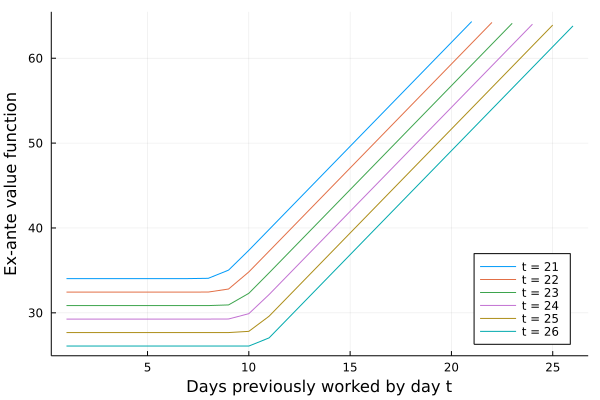

In [326]:
p = plot(1:(T_m - 5), EV[T_m - 5, 1:(T_m - 5)], label = "t = $(T_m - 5)", legend = :bottomright)
for i in 4:-1:0
    plot!(p, 1:(T_m - i), EV[T_m - i, 1:(T_m - i)], label = "t = $(T_m - i)")
end
xlabel!("Days previously worked by day t")
ylabel!("Ex-ante value function")
p

### Simulation

In [327]:
Nsim = 1000;
Random.seed!(1234);

In [328]:
work_mat = zeros(Int, Nsim, T_m);

for t in 1:(T_m - 1)
    ϵ = randn(Nsim);
    for n in 1:Nsim
        work_mat[n, t] = μ + ϵ[n] + EV[t + 1, sum(work_mat, dims = 2)[n] + 1] < EV[t + 1, sum(work_mat, dims = 2)[n] + 2]
    end
end

ϵ = randn(Nsim);
for n in 1:Nsim
    work_mat[n, T_m] = μ + ϵ[n] + β * income_func(sum(work_mat, dims = 2)[n]) < β * income_func(sum(work_mat, dims = 2)[n] + 1)
end


The plot below shows the work history of the first 20 teachers.
You can see that, while some teachers work most of the days, the other teachers work only a few days.
This difference comes from whether they could work for the first 2-3 days or not:
if they could, they are likely to achieve the 10-day goal for bonuses and hence they work hard.
On the other hand, teachers who could not work for the first several days give up and accept the minimum salary.

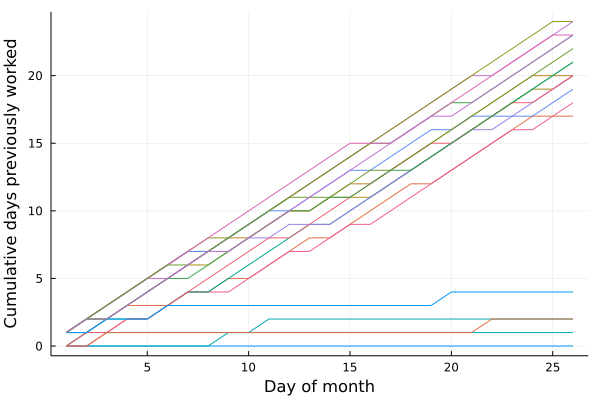

In [329]:
work_mat_cumsum = cumsum(work_mat, dims = 2);
d_state = [zeros(Int, Nsim, 1) work_mat_cumsum[:, 1:(T_m - 1)]];

p = plot(1:T_m, work_mat_cumsum[1, :], legend = false)
for i in 2:20
    plot!(p, 1:T_m, work_mat_cumsum[i, :], legend = false)
end
xlabel!("Day of month")
ylabel!("Cumulative days previously worked")
p

### Estimation

I estimate the parameters ($\beta$ and $\mu$) with the maximum likelihood method.
The log-likelihood function is
$$
    LL(\theta) = \sum_{i = 1}^N \sum_{t = 1}^{T_m} \left[ w_{it} \ln Pr(work; t, d, \theta) + (1 - w_{it}) \ln (1 - Pr(work; t, d, \theta)) \right],
$$
where $w_{it}$ is an indicator for working of a teacher $i$ on day $t$.
Note that, unlike the original function in the paper, I do not use the variation across months (I only simulate for data in one month).
(So I should use $T$ instead of $T_m$...)

In [330]:
# Log-likelihood function

function LL_func(param, work_mat, d_state)
    
    β = param[1];
    μ = param[2];

    # Matrix of EV
    EV = zeros(T_m, T_m);

    # Matrix of probabilities of working
    prob_work_mat = zeros(Float64, T_m, T_m);

    # Period T_m
    for d in 0:(T_m - 1)
        EV[T_m, d + 1] = pdf.(Normal(), β * (income_func(d + 1) - income_func(d)) - μ) + 
            (1.0 - cdf.(Normal(), β * (income_func(d + 1) - income_func(d)) - μ)) * (
                μ + β * income_func(d)
            ) + cdf.(Normal(), β * (income_func(d + 1) - income_func(d)) - μ) * β * income_func(d + 1);
        prob_work_mat[T_m, d + 1] = cdf.(Normal(), β * (income_func(d + 1) - income_func(d)) - μ);
    end

    # Period t < T_m

    for t in (T_m - 1):-1:1, d in 0:(t - 1)
        EV[t, d + 1] = pdf.(Normal(), EV[t + 1, d + 2] - EV[t + 1, d + 1] - μ) +
            (1.0 - cdf.(Normal(), EV[t + 1, d + 2] - EV[t + 1, d + 1] - μ)) * (
                μ + EV[t + 1, d + 1]
            ) + cdf.(Normal(), EV[t + 1, d + 2] - EV[t + 1, d + 1] - μ) * EV[t + 1, d + 2];
        prob_work_mat[t, d + 1] = cdf.(Normal(),  EV[t + 1, d + 2] - EV[t + 1, d + 1] - μ);
    end

    prob_work_mat = min.(max.(prob_work_mat, 1e-8), 1.0 - 1e-8);

    LL = sum(
        sum(
            work_mat[i, t] * log(prob_work_mat[t, d_state[i,t] + 1]) + 
                (1.0 - work_mat[i, t]) * log(1.0 - prob_work_mat[t, d_state[i,t] + 1]) 
                for t in 1:T_m
            ) for i in 1:Nsim
        );
    
    return LL
    
end

LL_func (generic function with 1 method)

In [331]:
init_param = [0.1, 0.1];
# For Optimization
opt_neg_ll = TwiceDifferentiable(
    param -> - LL_func(param, work_mat, d_state),
    init_param
    );

@time optimum = Optim.optimize(
    opt_neg_ll, 
    init_param,
)
SE = sqrt.(diag(inv(-NLSolversBase.hessian!(opt_neg_ll, optimum.minimizer))));


 40.571878 seconds (1.47 G allocations: 22.825 GiB, 5.92% gc time, 0.97% compilation time)


In [332]:
@printf "[β, μ] = [%0.4f, %0.3f]\n" β μ
@printf "[β̂, μ̂] = [%0.4f, %0.3f]\n" optimum.minimizer[1] optimum.minimizer[2]
@printf "SE = [%0.5f, %0.5f]" SE[1] SE[2]

[β, μ] = [0.0490, 1.564]
[β̂, μ̂] = [0.0491, 1.565]
SE = [0.00017, 0.00218]

## Case 2: Model with "Yesterday shifter"

The model above does not account for the serial correlation in shocks to a teacher's outside option (= the value of leisure).
This could be important because teachers may be absent for a couple of days in a row due to sickness, for example.

One way to allow serial correlation in shocks is to allow the value of leisure to depend on the lagged absence.
The expression in the paper (Equation (10)) is
$$
    \mu_{mt} = \mu + w_{m, t - 1} \cdot \gamma,
$$
where "$w_{m, t - 1}$ is an indicator function for whether the agent worked in the previous period."
Here, I make the following changes:
- If $\mu_{mt}$ is meant to be the entire preference shock on day $t$, there is no random component in the expression. My guess is that what it really means is
$$
    \mu_{tm} = \mu + w_{t - 1, m} \cdot \gamma + \epsilon_{tm}.
$$
- In the corresponding structural estimation in the paper (Model VI in Table 4), $\mu$ is allowed to differ across teachers and is assumed to follow a random normal distribution (I think $N(\mu_1, \sigma_1^2)$). So, here I consider the expression allowing this random $\mu$.
- The paper says "If $\gamma > 0$, then we expect that working today increases the probability of working tomorrow", but this contradicts the definition of $w_{t - 1, m}$: if this represents an indicator for working yesterday, $\gamma > 0$ increases the value of leisure and hence the teacher is less likely to work the day after working. (Actually, in the estimation of the paper, it seems $\gamma$ is added to the shock if a teacher does not work on the previous day (line 67 in "data/Structural-Programs/src/bruteforce/StateSpaceIIDYesterday.java" in the replication package).) Hence, I change the expression for the shock as follows:
$$
    \mu_{tm} = \mu_{m} + (1 - w_{t - 1, m}) \cdot \gamma + \epsilon_{tm},
$$
where $\mu_m \sim N(\mu_1, \sigma_1^2)$.

Again, I consider the ex-ante value functions as above.
The lagged working status needs to be added as another state variable: let me represent it by $w_{t - 1}$.
Also, to make explicit the dependence on $\mu_m$, I represent the ex-ante value function by $EV_m(t, d, w_{t - 1} \mid \mu_m)$.

For the day $T_m$, 

\begin{align*}
    EV_m(T_m, d, w_{T_m - 1} \mid \mu_m) 
    &= E \left[ \max \{ \mu_m + (1 - w_{T_m - 1}) \cdot \gamma + \epsilon_{T_m, m} + \beta \pi(d), \beta \pi(d + 1) \} \right] \\
    &= Pr(\text{not working on $T_m$}) E \left[ \mu_m + (1 - w_{T_m - 1}) \cdot \gamma + \epsilon_{T_m, m} + \beta \pi(d) | \text{not working on $T_m$} \right] \\
    &\qquad + Pr(\text{working on $T_m$}) E \left[ \beta \pi(d + 1) | \text{working on $T_m$} \right] \\
    &= Pr(\mu_m + (1 - w_{T_m - 1}) \cdot \gamma + \epsilon_{T_m, m} + \beta \pi(d) > \beta \pi(d + 1)) \left( \mu_m + (1 - w_{T_m - 1}) \cdot \gamma + \beta \pi(d) + E[\epsilon_{T_m, m} | \mu_m + (1 - w_{T_m - 1}) \cdot \gamma + \epsilon_{T_m, m} + \beta \pi(d) > \beta \pi(d + 1)] \right) \\
    &\qquad + Pr(\mu_m + (1 - w_{T_m - 1}) \cdot \gamma + \epsilon_{T_m, m} + \beta \pi(d) \le \beta \pi(d + 1)) \beta \pi(d + 1) \\
    &= (1 - \Phi( \beta (\pi(d + 1) - \pi(d)) - \mu_m - (1 - w_{T_m - 1}) \cdot \gamma)) \left( \mu_m + (1 - w_{T_m - 1}) \cdot \gamma + \beta \pi(d) + \frac{\phi( \beta (\pi(d + 1) - \pi(d)) - \mu_m - (1 - w_{T_m - 1}) \cdot \gamma)}{1 - \Phi( \beta (\pi(d + 1) - \pi(d)) - \mu_m - (1 - w_{T_m - 1}) \cdot \gamma)} \right) \\
    &\qquad + \Phi( \beta (\pi(d + 1) - \pi(d)) - \mu_m - (1 - w_{T_m - 1}) \cdot \gamma) \beta \pi(d + 1).
\end{align*}

For the other days, 
\begin{align*}
    EV_m(t, d, w_{t - 1} \mid \mu_m) 
    &= E \left[ \max \{ \mu_m + (1 - w_{T_m - 1}) \cdot \gamma + \epsilon_{tm} + EV_m(t + 1, d, 0 \mid \mu_m), EV_m(t + 1, d + 1, 1 \mid \mu_m) \} \right] \\
    &= Pr(\text{not working on $t$}) E \left[ \mu_m + (1 - w_{T_m - 1}) \cdot \gamma + \epsilon_{tm} + EV_m(t + 1, d, 0 \mid \mu_m) | \text{not working on $t$} \right] \\
    &\qquad + Pr(\text{working on $t$}) E \left[ EV_m(t + 1, d + 1, 1 \mid \mu_m) | \text{working on $t$} \right] \\
    &= Pr(\mu_m + (1 - w_{T_m - 1}) \cdot \gamma + \epsilon_{tm} + EV_m(t + 1, d, 0 \mid \mu_m) > EV_m(t + 1, d + 1, 1 \mid \mu_m)) \left( \mu_m + (1 - w_{T_m - 1}) \cdot \gamma + EV_m(t + 1, d, 0 \mid \mu_m) + E \left[ \epsilon_{tm} | \text{not working on $t$} \right] \right) \\
    &\qquad + Pr(\mu_m + (1 - w_{T_m - 1}) \cdot \gamma + \epsilon_{tm} + EV_m(t + 1, d, 0 \mid \mu_m) \le EV_m(t + 1, d + 1, 1 \mid \mu_m)) EV_m(t + 1, d + 1, 1 \mid \mu_m) \\
    &= (1 - \Phi( EV_m(t + 1, d + 1, 1 \mid \mu_m) - EV_m(t + 1, d, 0 \mid \mu_m) - \mu_m - (1 - w_{T_m - 1}) \cdot \gamma)) \left( \mu_m + (1 - w_{T_m - 1}) \cdot \gamma + EV_m(t + 1, d, 0 \mid \mu_m) + \frac{\phi( EV_m(t + 1, d + 1, 1 \mid \mu_m) - EV_m(t + 1, d, 0 \mid \mu_m) - \mu_m - (1 - w_{T_m - 1}) \cdot \gamma)}{1 - \Phi( EV_m(t + 1, d + 1, 1 \mid \mu_m) - EV_m(t + 1, d, 0 \mid \mu_m) - \mu_m - (1 - w_{T_m - 1}) \cdot \gamma)} \right) \\
    &\qquad + \Phi( EV_m(t + 1, d + 1, 1 \mid \mu_m) - EV_m(t + 1, d, 0 \mid \mu_m) - \mu_m - (1 - w_{T_m - 1}) \cdot \gamma) EV_m(t + 1, d + 1, 1 \mid \mu_m).
\end{align*}


### Solve the dynamic programming problem

In the estimation, I approximate the expectation by the Gaussian quadrature method.
Hence, I solve the dynamic programming problem at each node (I use 20 nodes).

In [333]:
# Parameters
β = 0.017; 
μ₁ = -0.304;
σ₁ = sqrt(0.252);
T_m = 26;
γ = 0.094;
n_nodes = 20;
nodes, weights = qnwnorm(n_nodes);

# earning income function
income_func(d) = 500 + 50 * max(0, d - 10);

In [334]:
# Matrix of EV
EV = zeros(T_m, T_m, 2, n_nodes);

In [335]:
for (i, u) in enumerate(nodes)
    μₘ = μ₁ + u * σ₁
    # Period T_m
    for d in 0:(T_m - 1), w in 0:1
        EV[T_m, d + 1, w + 1, i] =  pdf.(Normal(), β * (income_func(d + 1) - income_func(d)) - μₘ - (1 - w) * γ) + 
        (1.0 - cdf.(Normal(), β * (income_func(d + 1) - income_func(d)) - μₘ - (1 - w) * γ)) * (
            μₘ + (1 - w) * γ + β * income_func(d)
        ) + cdf.(Normal(), β * (income_func(d + 1) - income_func(d)) - μₘ - (1 - w) * γ) * β * income_func(d + 1);
    end

    # Period t < T_m

    for t in (T_m - 1):-1:1, d in 0:(t - 1), w in 0:1
        EV[t, d + 1, w + 1, i] = pdf.(Normal(), EV[t + 1, d + 2, 2, i] - EV[t + 1, d + 1, 1, i] - μₘ - (1 - w) * γ) + 
        (1.0 - cdf.(Normal(), EV[t + 1, d + 2, 2, i] - EV[t + 1, d + 1, 1, i] - μₘ - (1 - w) * γ)) * (
            μₘ + (1 - w) * γ + EV[t + 1, d + 1, 1, i] 
        ) + cdf.(Normal(), EV[t + 1, d + 2, 2, i] - EV[t + 1, d + 1, 1, i] - μₘ - (1 - w) * γ) * EV[t + 1, d + 2, 2, i];
    end
end


### Simulation

Here, I assume that no teacher worked before the first period.

In [336]:
Nsim = 1000;
Random.seed!(1234);

In [337]:
work_mat = zeros(Int, Nsim, T_m);
nodes_sample = sample(1:n_nodes, StatsBase.Weights(weights), Nsim)
ϵ_mat = randn(Nsim, T_m)

for n in 1:Nsim
    μₘ = μ₁ + nodes[nodes_sample[n]] * σ₁

    work_mat[n, 1] = μₘ + γ + ϵ_mat[n, 1] + EV[2, sum(work_mat, dims = 2)[n] + 1, 1, nodes_sample[n]] < EV[2, sum(work_mat, dims = 2)[n] + 2, 2, nodes_sample[n]]

    for t in 2:(T_m - 1)
        work_mat[n, t] = μₘ + (1 - work_mat[n, t - 1]) * γ + ϵ_mat[n, t] + EV[t + 1, sum(work_mat, dims = 2)[n] + 1, 1, nodes_sample[n]] < EV[t + 1, sum(work_mat, dims = 2)[n] + 2, 2, nodes_sample[n]]
    end

    work_mat[n, T_m] = μₘ + (1 - work_mat[n, T_m - 1]) * γ + ϵ_mat[n, T_m] + β * income_func(sum(work_mat, dims = 2)[n]) < β * income_func(sum(work_mat, dims = 2)[n] + 1)
end

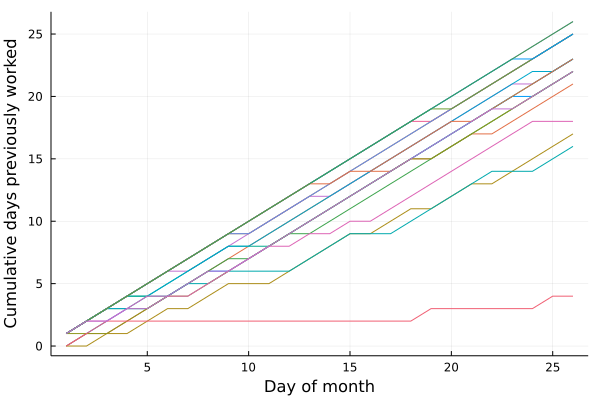

In [338]:
work_mat_cumsum = cumsum(work_mat, dims = 2);
d_state = [zeros(Int, Nsim, 1) work_mat_cumsum[:, 1:(T_m - 1)]];

p = plot(1:T_m, work_mat_cumsum[1, :], legend = false)
for i in 2:20
    plot!(p, 1:T_m, work_mat_cumsum[i, :], legend = false)
end
xlabel!("Day of month")
ylabel!("Cumulative days previously worked")
p

### Estimation

I estimate the parameters ($\beta$, $\mu_1$, $\sigma_1$, and $\gamma$) with the maximum likelihood method.
Compared to the previous case, one additional complication comes from the random $\mu_m$.
The likelihood function is
$$
    L(\theta) = \prod_{i = 1}^N E \left[ \prod_{t = 1}^{T_m} Pr(\text{working}; t, d, w_{t - 1}, \mu_m)^{w_{it}} (1 - Pr(\text{not working}; t, d, w_{t - 1}, \mu_m)^{1 - w_{it}} \right],
$$
where the expectation is over $\mu_m \sim N(\mu_1, \sigma_1)$, and the log-likelihood function is 
$$
    LL(\theta) = \sum_{i = 1}^N \log \left[ E \left[ \prod_{t = 1}^{T_m} Pr(\text{working}; t, d, w_{t - 1}, \mu_m)^{w_{it}} (1 - Pr(\text{not working}; t, d, w_{t - 1}, \mu_m)^{1 - w_{it}} \right] \right],
$$
which looks more complicated than the one in the case with IID shocks.

For the expectation, as mentioned above, I use the Gaussian quadrature method for approximation with 20 nodes:
$$
    LL(\theta) \approx \sum_{i = 1}^N \log \left[ \sum_{j = 1}^{20} x_j \left[ \prod_{t = 1}^{T_m} Pr(\text{working}; t, d, w_{t - 1}, \mu_m^j)^{w_{it}} (1 - Pr(\text{not working}; t, d, w_{t - 1}, \mu_m^j)^{1 - w_{it}} \right] \right],
$$
where $x_j$ is a weight on a node $j$.

Since I (arbitrarily) assumed in the simulation that no teacher worked before the first period, for estimation, I use the observations from day 2 and onward.

In [339]:
# Log-likelihood function

function LL_func_yesterday(param, work_mat, d_state)
    
    β = param[1];
    μ₁ = param[2];
    σ₁ = param[3];
    γ = param[4];

    # Matrix of EV
    EV = zeros(T_m, T_m, 2, n_nodes);

    # Matrix of probabilities of working
    prob_work_mat = zeros(Float64, T_m, T_m, 2, n_nodes);

    for (i, u) in enumerate(nodes)
        μₘ = μ₁ + u * σ₁
        # Period T_m
        for d in 0:(T_m - 1), w in 0:1
            EV[T_m, d + 1, w + 1, i] =  pdf.(Normal(), β * (income_func(d + 1) - income_func(d)) - μₘ - (1 - w) * γ) + 
                (1.0 - cdf.(Normal(), β * (income_func(d + 1) - income_func(d)) - μₘ - (1 - w) * γ)) * (
                    μₘ + (1 - w) * γ + β * income_func(d)
                ) + cdf.(Normal(), β * (income_func(d + 1) - income_func(d)) - μₘ - (1 - w) * γ) * β * income_func(d + 1);
            prob_work_mat[T_m, d + 1, w + 1, i] = cdf.(Normal(), β * (income_func(d + 1) - income_func(d)) - μₘ - (1 - w) * γ)
        end

        # Period t < T_m

        for t in (T_m - 1):-1:1, d in 0:(t - 1), w in 0:1
            EV[t, d + 1, w + 1, i] = pdf.(Normal(), EV[t + 1, d + 2, 2, i] - EV[t + 1, d + 1, 1, i] - μₘ - (1 - w) * γ) + 
                (1.0 - cdf.(Normal(), EV[t + 1, d + 2, 2, i] - EV[t + 1, d + 1, 1, i] - μₘ - (1 - w) * γ)) * (
                    μₘ + (1 - w) * γ + EV[t + 1, d + 1, 1, i] 
                ) + cdf.(Normal(), EV[t + 1, d + 2, 2, i] - EV[t + 1, d + 1, 1, i] - μₘ - (1 - w) * γ) * EV[t + 1, d + 2, 2, i];
            prob_work_mat[t, d + 1, w + 1, i] = cdf.(Normal(),  EV[t + 1, d + 2, 2, i] - EV[t + 1, d + 1, 1, i] - μₘ - (1 - w) * γ);
        end
    end

    prob_work_mat = min.(max.(prob_work_mat, 1e-12), 1.0 - 1e-12);
        
    LL = sum(
        log(sum(
            weights[j] * prod(
                prob_work_mat[t, d_state[i,t] + 1, work_mat[i, t - 1] + 1, j]^work_mat[i, t] * 
                    (1.0 - prob_work_mat[t, d_state[i,t] + 1, work_mat[i, t - 1] + 1, j])^(1.0 - work_mat[i, t]) 
                    for t in 2:T_m
                ) for j in 1:n_nodes
            )) for i in 1:Nsim
        );
    
    return LL
    
end

LL_func_yesterday (generic function with 1 method)

In [340]:
init_param = [0.1, -0.1, 0.1, 0.1];
# For Optimization
opt_neg_ll_yesterday = TwiceDifferentiable(
    param -> - LL_func_yesterday(param, work_mat, d_state),
    init_param
    );

@time optimum = Optim.optimize(
    opt_neg_ll_yesterday, 
    [-1.0, -1.0, 1e-8, -1.0],
    [1.0, 1.0, 2.0, 1.0],
    init_param,
)
SE = sqrt.(diag(inv(NLSolversBase.hessian!(opt_neg_ll_yesterday, optimum.minimizer))));


374.389164 seconds (10.99 G allocations: 178.316 GiB, 5.57% gc time, 0.10% compilation time)


In [341]:
@printf "[β, μ₁, σ₁, γ] = [%0.4f, %0.3f, %0.3f, %0.3f]\n" β μ₁ σ₁ γ
@printf "[β̂, μ̂₁, σ̂₁, γ̂] = [%0.4f, %0.3f, %0.3f, %0.3f]\n" optimum.minimizer[1] optimum.minimizer[2] optimum.minimizer[3] optimum.minimizer[4]
@printf "SE = [%0.5f, %0.5f, %0.5f, %0.5f]" SE[1] SE[2] SE[3] SE[4]

[β, μ₁, σ₁, γ] = [0.0170, -0.304, 0.502, 0.094]
[β̂, μ̂₁, σ̂₁, γ̂] = [0.0182, -0.259, 0.491, 0.100]
SE = [0.00135, 0.07038, 0.02027, 0.02794]

## Case 3: Shocks with serial correlation

Another way to account for the persistence in the value of leisure across days is to introduce auto correlation in the preference shocks.
The paper considers the following AR(1) process for the shock process:
$$
    \epsilon_{tm} = \rho \epsilon_{t - 1, m} + \nu_{tm},
$$
where $\rho$ is the persistence parameter and $\nu_{tm}$ is a random variable following the standard normal distribution.
This corresponds to Model III in Table 4 of the paper.

Again, I consider the ex-ante value functions as above.
I represent the ex-ante value function by $EV_m(t, d, \epsilon_{t - 1})$ and the shock process by $\mu_t = \rho \mu_{t - 1} + \nu_t$.
Notice the additional state variable, $\epsilon_{t - 1}$.

For the day $T_m$, 

\begin{align*}
    EV_m(T_m, d, \epsilon_{T_m - 1}) 
    &= E \left[ \max \{ \mu + \epsilon_{T_m} + \beta \pi(d), \beta \pi(d + 1) \} \mid \epsilon_{T_m - 1} \right] \\
    &= Pr(\text{not working on $T_m$} \mid \epsilon_{T_m - 1}) E \left[ \mu + \epsilon_{T_m} + \beta \pi(d) \mid \text{not working on $T_m$}, \epsilon_{T_m - 1} \right] \\
    &\qquad + Pr(\text{working on $T_m$} \mid \epsilon_{T_m - 1} ) E \left[ \beta \pi(d + 1) \mid \text{working on $T_m$}, \epsilon_{T_m - 1} \right] \\
    &= Pr(\mu + \epsilon_{T_m} + \beta \pi(d) > \beta \pi(d + 1) \mid \epsilon_{T_m - 1}) \left( \mu + \beta \pi(d) + E[\epsilon_{T_m} \mid \mu + \epsilon_{T_m} + \beta \pi(d) > \beta \pi(d + 1), \epsilon_{T_m - 1}] \right) \\
    &\qquad + Pr(\mu + \epsilon_{T_m} + \beta \pi(d) \le \beta \pi(d + 1) \mid \epsilon_{T_m - 1}) \beta \pi(d + 1) \\
    &= Pr(\mu + \rho \epsilon_{T_m - 1} + \nu_{T_m} + \beta \pi(d) > \beta \pi(d + 1) \mid \epsilon_{T_m - 1}) \left( \mu + \beta \pi(d) + \rho \epsilon_{T_m - 1} + E[\nu_{T_m} \mid \mu + \epsilon_{T_m - 1} + \nu_{T_m} + \beta \pi(d) > \beta \pi(d + 1), \epsilon_{T_m - 1}] \right) \\
    &\qquad + Pr(\mu + \rho \epsilon_{T_m - 1} + \nu_{T_m} + \beta \pi(d) \le \beta \pi(d + 1) \mid \epsilon_{T_m - 1}) \beta \pi(d + 1) \\
    &= (1 - \Phi( \beta (\pi(d + 1) - \pi(d)) - \mu - \rho \epsilon_{T_m - 1})) \left( \mu + \rho \epsilon_{T_m - 1} + \beta \pi(d) + \frac{\phi( \beta (\pi(d + 1) - \pi(d)) - \mu - \rho \epsilon_{T_m - 1})}{1 - \Phi( \beta (\pi(d + 1) - \pi(d)) - \mu - \rho \epsilon_{T_m - 1})} \right) \\
    &\qquad + \Phi( \beta (\pi(d + 1) - \pi(d)) - \mu - \rho \epsilon_{T_m - 1}) \beta \pi(d + 1).
\end{align*}

Remember that $\nu$ follows the standard normal distribution.

For the other days, 
\begin{align*}
    EV_m(t, d, \epsilon_{t - 1}) 
    &= E \left[ \max \{ \mu + \epsilon_{t} + EV_m(t + 1, d, \epsilon_{t}), EV_m(t + 1, d + 1, \epsilon_{t}) \} \mid \epsilon_{t - 1} \right] \\
    &= Pr(\text{not working on $t$} \mid \epsilon_{t - 1}) E \left[ \mu + \epsilon_{t} + EV_m(t + 1, d, \epsilon_{t}) \mid \text{not working on $t$}, \epsilon_{t - 1} \right] \\
    &\qquad + Pr(\text{working on $t$} \mid \epsilon_{t - 1}) E \left[ EV_m(t + 1, d + 1, \epsilon_t) | \text{working on $t$}, \epsilon_{t - 1} \right] \\
    &= Pr(\mu + \epsilon_{t} + EV_m(t + 1, d, \epsilon_{t}) > EV_m(t + 1, d + 1, \epsilon_{t}) \mid \epsilon_{t - 1}) \left( \mu + E \left[ EV_m(t + 1, d, \epsilon_{t}) \mid \text{not working on $t$}, \epsilon_{t - 1} \right] + E \left[ \epsilon_{t} | \text{not working on $t$}, \epsilon_{t - 1} \right] \right) \\
    &\qquad + Pr(\mu + \epsilon_{t} + EV_m(t + 1, d, \epsilon_{t}) \le EV_m(t + 1, d + 1, \epsilon_{t}) \mid \epsilon_{t - 1}) E \left[ EV_m(t + 1, d + 1, \epsilon_{t}) \mid \text{working on $t$}, \epsilon_{t - 1} \right].
\end{align*}

I approximate this by the Tauchen's method for the AR(1) process of the preference shocks.

### Solve the dynamic programming problem

In [342]:
# Parameters
β = 0.055; 
μ = 1.777;
ρ = 0.422;
T_m = 27; # I use 27 days instead of 26 days as above 
          # because 26 days resulted in too few work days in the given parameters,
          # which suggests some mistakes in my codes...
n_nodes = 200;

# earning income function
income_func(d) = 500 + 50 * max(0, d - 10);

In [343]:
# AR(1) process approximation by Tauchen's method
ϵ_AR1 = tauchen(n_nodes, ρ, 1.0);
ϵ_transition_prob = ϵ_AR1.p;
ϵ_values = ϵ_AR1.state_values;

In [344]:
# Matrix of EV
EV = zeros(T_m, T_m, n_nodes);

In [345]:
# Period T_m
for d in 0:(T_m - 1), (i, ϵ) in enumerate(ϵ_values)
    EV[T_m, d + 1, i] =  pdf.(Normal(), β * (income_func(d + 1) - income_func(d)) - μ - ρ * ϵ) + 
    (1.0 - cdf.(Normal(), β * (income_func(d + 1) - income_func(d)) - μ - ρ * ϵ)) * (
        μ + ρ * ϵ + β * income_func(d)
    ) + cdf.(Normal(), β * (income_func(d + 1) - income_func(d)) - μ - ρ * ϵ) * β * income_func(d + 1);
end

# Period t < T_m

for t in (T_m - 1):-1:1, d in 0:(t - 1), (i, ϵ) in enumerate(ϵ_values)

    ϵ_next_work = (μ .+ ϵ_values .+ EV[t + 1, d + 1, :] .< EV[t + 1, d + 2, :])
    prob_work = sum(ϵ_next_work .* ϵ_transition_prob[i, :])

    EV[t, d + 1, i] = (1.0 - prob_work) .* (
        μ + 
        sum(EV[t + 1, d + 1, :] .* (1 .- ϵ_next_work) .* ϵ_transition_prob[i, :]) / (1.0 - prob_work) +
        sum(ϵ_values .* (1 .- ϵ_next_work) .* ϵ_transition_prob[i, :]) / (1.0 - prob_work)
        ) + prob_work .* sum(EV[t + 1, d + 2, :] .* ϵ_next_work .* ϵ_transition_prob[i, :]) / prob_work;
end


### Simulation

For the first-period error, I draw it from an unconditional distribution.

In [346]:
Nsim = 1000;
Random.seed!(1234);

In [347]:
work_mat = zeros(Int, Nsim, T_m);

# Initial ϵ drawn from an unconditional normal distribution
ϵ_prob_first = (ϵ_transition_prob^100)[1, :];
ϵ_sample_first = sample(1:n_nodes, StatsBase.Weights(ϵ_prob_first), Nsim);

for n in 1:Nsim

    ϵ_idx = ϵ_sample_first[n];
    work_mat[n, 1] = μ + ϵ_values[ϵ_idx] + EV[2, sum(work_mat, dims = 2)[n] + 1, ϵ_idx] < EV[2, sum(work_mat, dims = 2)[n] + 2, ϵ_idx];
    ϵ_prev_idx = ϵ_idx;

    for t in 2:(T_m - 1)
        ϵ_idx = sample(1:n_nodes, StatsBase.Weights(ϵ_transition_prob[ϵ_prev_idx, :]));
        work_mat[n, t] = μ + ϵ_values[ϵ_idx] + EV[t + 1, sum(work_mat, dims = 2)[n] + 1, ϵ_idx] < EV[t + 1, sum(work_mat, dims = 2)[n] + 2, ϵ_idx]
        ϵ_prev_idx = ϵ_idx;
    end

    ϵ_idx = sample(1:n_nodes, StatsBase.Weights(ϵ_transition_prob[ϵ_prev_idx, :]));
    work_mat[n, T_m] = μ + ϵ_values[ϵ_idx] + β * income_func(sum(work_mat, dims = 2)[n]) < β * income_func(sum(work_mat, dims = 2)[n] + 1)
end

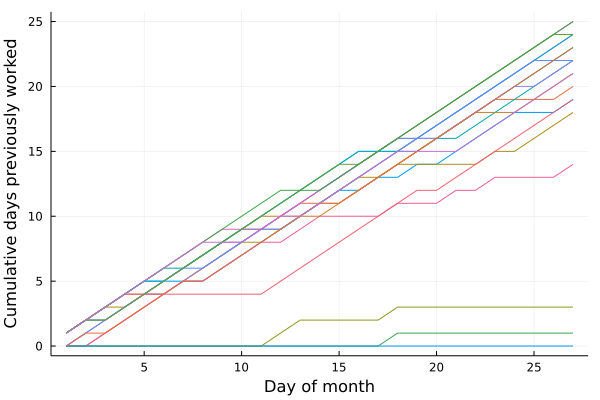

In [348]:
work_mat_cumsum = cumsum(work_mat, dims = 2);
d_state = [zeros(Int, Nsim, 1) work_mat_cumsum[:, 1:(T_m - 1)]];

p = plot(1:T_m, work_mat_cumsum[1, :], legend = false)
for i in 2:20
    plot!(p, 1:T_m, work_mat_cumsum[i, :], legend = false)
end
xlabel!("Day of month")
ylabel!("Cumulative days previously worked")
p

In [349]:
work_first_5_days_freq = proportionmap(prod(string.(work_mat[:, 1:5]), dims = 2));
work_first_5_days_freq_df = DataFrame(
    combination = collect(keys(work_first_5_days_freq)), 
    freq = collect(values(work_first_5_days_freq))
)
sort!(work_first_5_days_freq_df, :freq);

The plot below shows the fractions of each combination of work for the first five days.
For the method of simulated moments, basically you can compare these values and the observed proportions of each combination.
The Online Appendix details the process.

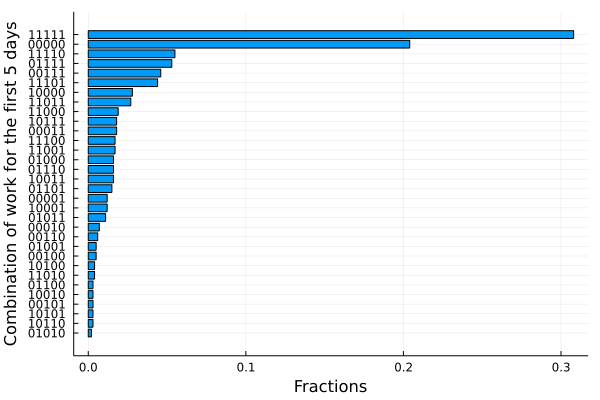

In [362]:
bar(
    work_first_5_days_freq_df.combination, 
    work_first_5_days_freq_df.freq, 
    orientation = :horizontal, 
    legend = false, 
    yticks = :all,
)
xlabel!("Fractions")
ylabel!("Combination of work for the first 5 days")